In [1]:
# base tool
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows',100)
import numpy as np
from sklearn.model_selection import train_test_split
import copy

import warnings
warnings.filterwarnings('ignore')

#visualization
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import seaborn as sns    

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"


In [2]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        st = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    st.columns = cols
    print('___________________________\nData Types:')
    print(st.Types.value_counts())
    print('___________________________')
    return st

In [3]:
raw_data = pd.read_csv('./Tetuan City power consumption.csv')
raw_data= pd.DataFrame(raw_data)

In [4]:
summary(raw_data)

Data shape: (52416, 9)
___________________________
Data Types:
float64    8
object     1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
DateTime,object,52416,52416,0,1/1/2017 0:00,9/9/2017 9:50
Humidity,float64,52416,4443,0,11.34,94.8
Temperature,float64,52416,3437,0,3.247,40.01
Wind Speed,float64,52416,548,0,0.05,6.483
Zone 1 Power Consumption,float64,52416,27709,0,13895.7,52204.4
Zone 2 Power Consumption,float64,52416,29621,0,8560.08,37408.9
Zone 3 Power Consumption,float64,52416,22838,0,5935.17,47598.3
diffuse flows,float64,52416,10449,0,0.011,936
general diffuse flows,float64,52416,10504,0,0.004,1163


In [12]:
heat_temp = raw_data.iloc[:,-3:]
r_column = list(heat_temp.columns)
heat_temp.rename(columns={r_column[0]:'Zone1',r_column[1]:'Zone2',r_column[2]:'Zone3'},inplace=True)

<AxesSubplot:>

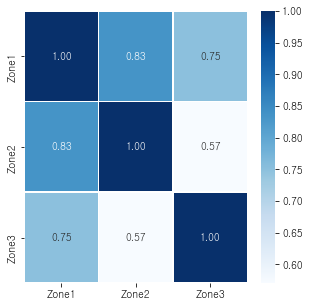

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(data = heat_temp.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [19]:
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(raw_data.iloc[:,-2],raw_data.iloc[:,-1])
corr

(0.5709322667566566, 0.0)

In [20]:
corr = stats.pearsonr(raw_data.iloc[:,-3],raw_data.iloc[:,-2])
corr

(0.8345189396462863, 0.0)